In [1]:
%pip --quiet install qiskit pylatexenc
%matplotlib inline

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.extensions import Initialize
from random import choice

# Loading your IBM Q account(s)
# IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

Note: you may need to restart the kernel to use updated packages.


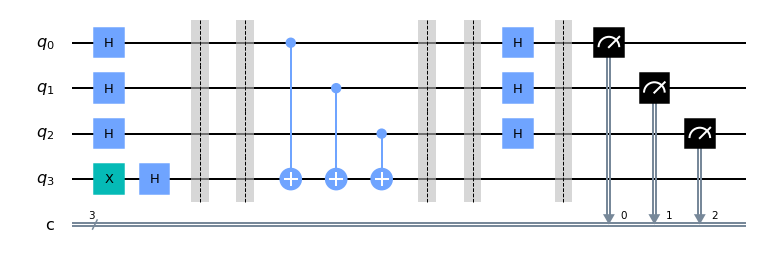

In [2]:
## SETUP
bowls = ['000', '111', '101']
bowl = choice(bowls)
qc = QuantumCircuit(len(bowl)+1, len(bowl))


## STEP 0
# Initalize porridge qubits to 1/√(2)|+> + 1/√(2)|->
qc.h(range(len(bowl)))
# Initalize DJ qubit to -|1>
qc.x(len(bowl))
qc.h(len(bowl))
qc.barrier()

## STEP 1
# Encode bowl of porridge as a constant or balanced function
for qubit, spoonful in enumerate(bowl):
    if spoonful == '1':
        qc.x(qubit)
qc.barrier()

# Check to apply C-NOT gates
if len(set(bowl)) == 1:
    for qubit in range(len(bowl)):
        qc.cx(qubit, len(bowl))
    qc.barrier()

## STEP 3
# Repeat step 1
for qubit, spoonful in enumerate(bowl):
    if spoonful == '1':
        qc.x(qubit)
qc.barrier()

## STEP 4
# Apply H-gates
qc.h(range(len(bowl)))
qc.barrier()

## STEP 5
# Measure
qc.measure(range(len(bowl)), range(len(bowl)))

qc.draw('mpl')

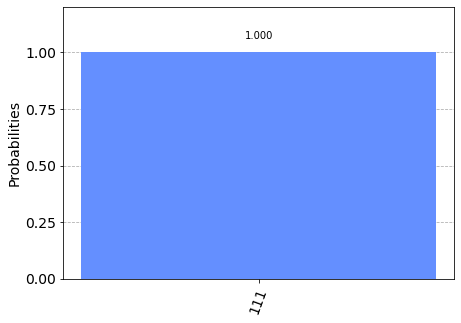

In [3]:
results = execute(qc, backend=backend).result()
answer = results.get_counts()
plot_histogram(answer)